In [89]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset

In [93]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 1)


for img in glob.glob(r"/content/drive/MyDrive/datasets2/Covid19-dataset/train/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 2)




In [94]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Prepare and load data Test

In [95]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 2)

# Create the base model from the pre-trained model InceptionV3

In [96]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

                                            

In [97]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_shape=(x_train[0].shape))

In [98]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 64, 64, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 64, 64, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [99]:
conv_model = Model(inputs=base_model.input,
                   outputs=base_model.get_layer('mixed10').output)

In [100]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [101]:
train_ds = preprocess_input(x_train)
valid_ds = preprocess_input(x_valid) 
test_ds = preprocess_input(x_test)

In [102]:
flatten_layer = layers.Flatten()
dropout_layer_1 = layers.Dropout(0.5)
dense_layer_1 = layers.Dense(4096, activation='relu')
dense_layer_1 = layers.Dense(4096, activation='relu')

prediction_layer = layers.Dense(3, activation='softmax')

In [103]:
model = Sequential([
    conv_model,
    flatten_layer,
    dropout_layer_1,
    dense_layer_1,
    prediction_layer
])

# fine-tuning

In [104]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [105]:
conv_model.trainable = True
set_trainable = False
for layer in conv_model.layers:
  if layer.name == 'conv2d_55':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 64, 64, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 64, 64, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [106]:
print_layer_trainable()

False:	input_4
False:	conv2d_282
False:	batch_normalization_282
False:	activation_282
False:	conv2d_283
False:	batch_normalization_283
False:	activation_283
False:	conv2d_284
False:	batch_normalization_284
False:	activation_284
False:	max_pooling2d_12
False:	conv2d_285
False:	batch_normalization_285
False:	activation_285
False:	conv2d_286
False:	batch_normalization_286
False:	activation_286
False:	max_pooling2d_13
False:	conv2d_290
False:	batch_normalization_290
False:	activation_290
False:	conv2d_288
False:	conv2d_291
False:	batch_normalization_288
False:	batch_normalization_291
False:	activation_288
False:	activation_291
False:	average_pooling2d_27
False:	conv2d_287
False:	conv2d_289
False:	conv2d_292
False:	conv2d_293
False:	batch_normalization_287
False:	batch_normalization_289
False:	batch_normalization_292
False:	batch_normalization_293
False:	activation_287
False:	activation_289
False:	activation_292
False:	activation_293
False:	mixed0
False:	conv2d_297
False:	batch_normalizatio

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 4096)              33558528  
                                                                 
 dense_11 (Dense)            (None, 3)                 12291     
                                                                 
Total params: 55,373,603
Trainable params: 33,570,819
Non-trainable params: 21,802,784
_________________________________________________________________


In [108]:
from tensorflow.keras.callbacks import EarlyStopping
optimizer = tf.keras.optimizers.Adam(0.000002)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])


# Train The Model

In [109]:
history = model.fit(train_ds,y_train, validation_data= (valid_ds,y_valid),  
                             epochs=100,
                              verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping
                               (monitor="val_loss",
                                patience=30,verbose=1,
                                restore_best_weights=True),
                               ])


Epoch 1/100
5/5 [==============================] - 7s 479ms/step - loss: 2.0889 - accuracy: 0.3481 - val_loss: 1.8488 - val_accuracy: 0.2857
Epoch 2/100
5/5 [==============================] - 0s 102ms/step - loss: 1.9816 - accuracy: 0.4430 - val_loss: 1.5912 - val_accuracy: 0.3571
Epoch 3/100
5/5 [==============================] - 0s 93ms/step - loss: 1.9169 - accuracy: 0.4177 - val_loss: 1.3063 - val_accuracy: 0.4286
Epoch 4/100
5/5 [==============================] - 0s 100ms/step - loss: 1.6929 - accuracy: 0.4873 - val_loss: 1.0351 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 0s 104ms/step - loss: 1.3299 - accuracy: 0.5380 - val_loss: 0.8988 - val_accuracy: 0.6071
Epoch 6/100
5/5 [==============================] - 0s 98ms/step - loss: 1.4488 - accuracy: 0.5316 - val_loss: 0.8238 - val_accuracy: 0.6071
Epoch 7/100
5/5 [==============================] - 0s 98ms/step - loss: 0.9923 - accuracy: 0.6582 - val_loss: 0.8036 - val_accuracy: 0.6429
Epoch 8/100
5/5 

# plot the loss and accuracy of the model

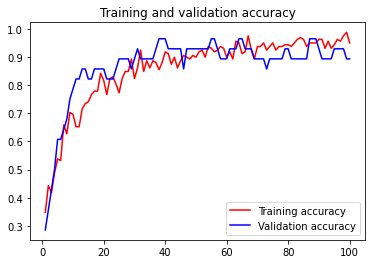

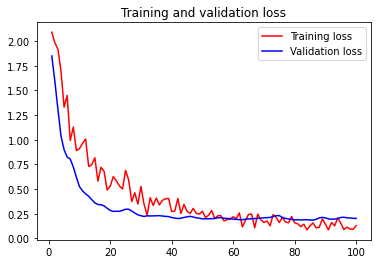

In [110]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Smoothed


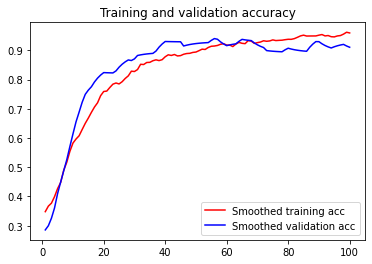

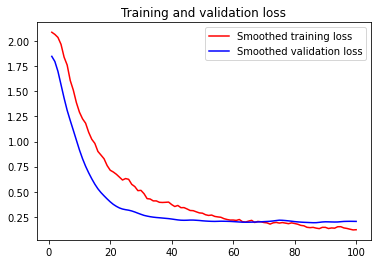

In [111]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

# train & test loss and accuracy

In [112]:
train_loss, train_acc= model.evaluate(train_ds,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

5/5 [==============================] - 0s 31ms/step - loss: 0.0107 - accuracy: 1.0000
train acc: 1.0
train loss: 0.01069952454417944


In [113]:
test_loss, test_acc = model.evaluate(test_ds,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

2/2 [==============================] - 0s 25ms/step - loss: 0.4328 - accuracy: 0.8077
test acc: 0.807692289352417
test loss: 0.4327923357486725
